In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
# Load dataset
df = pd.read_csv("youtube_dislike_dataset.csv")
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [3]:
df1=df.copy()

Exploratory Data Analysis (EDA) Steps:

Basic Information: Dataset shape, columns, data types, and descriptive statistics

Missing Values Analysis: Identification and visualization of missing data

Numerical Analysis: Distribution plots and correlation heatmaps

Outlier Detection: Using IQR method with box plots

In [4]:
df.shape

(37422, 12)

In [5]:
df.columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'view_count', 'likes', 'dislikes', 'comment_count', 'tags',
       'description', 'comments'],
      dtype='object')

In [6]:
df.dtypes

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object

In [7]:
df.describe().round()

,view_count,likes,dislikes,comment_count
count,3.742200e+04,37422.0,37422.0,37422.0
mean,5.697838e+06,166815.0,4990.0,9925.0
std,2.426622e+07,537567.0,30708.0,117100.0
min,2.036800e+04,0.0,0.0,0.0
25%,5.122970e+05,13234.0,281.0,900.0
50%,1.319078e+06,42330.0,796.0,2328.0
75%,3.670231e+06,130470.0,2462.0,6184.0
max,1.322797e+09,31837675.0,2397733.0,16071029.0


In [8]:
df.isna().sum()

video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


Purpose:

To identify and possibly filter out extreme values (outliers) in the dataset.

In [11]:
dict1={}
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float":
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        min_range=q1-1.5*iqr
        max_range=q3+1.5*iqr
        dict1[i]=(min_range,max_range)

In [12]:
dict1

{'view_count': (-4224604.375, 8407132.625),
 'likes': (-162620.875, 306324.125),
 'dislikes': (-2990.125, 5732.875),
 'comment_count': (-7026.0, 14110.0)}

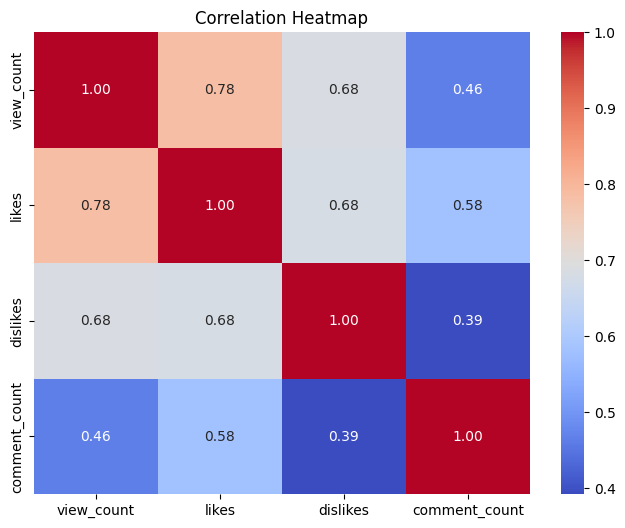

In [13]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Heatmap
Variable Pair	Correlation	Interpretation

view_count & likes	            0.78	    Strong positive correlation: more views tend to mean more likes.

view_count & dislikes	        0.68	    Moderate-to-strong positive correlation: more views also tend to mean more dislikes.

view_count & comment_count      0.46	    Moderate positive correlation: more views often mean more comments, but less strongly.

likes & dislikes	            0.68	    Moderate-to-strong positive correlation: videos with more likes also get more dislikes.

likes & comment_count	        0.58	    Moderate positive correlation: more likes are associated with more comments.

dislikes & comment_count	    0.39	    Weak-to-moderate positive correlation: more dislikes are somewhat linked to more comments.

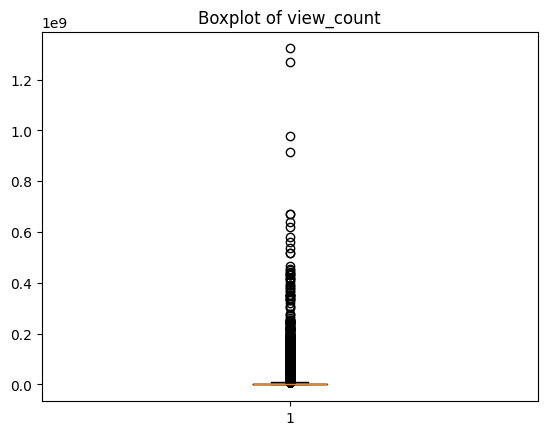

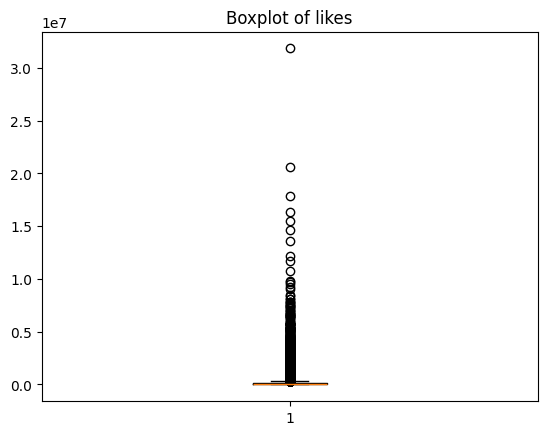

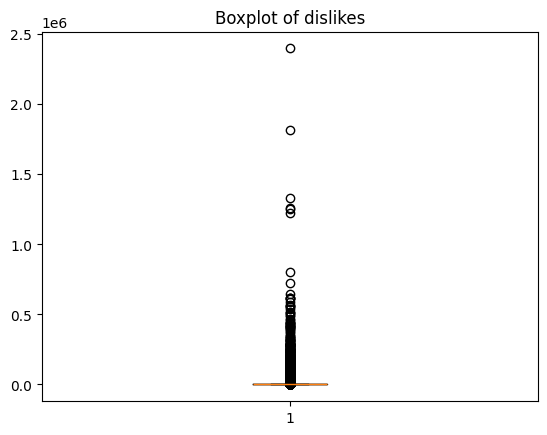

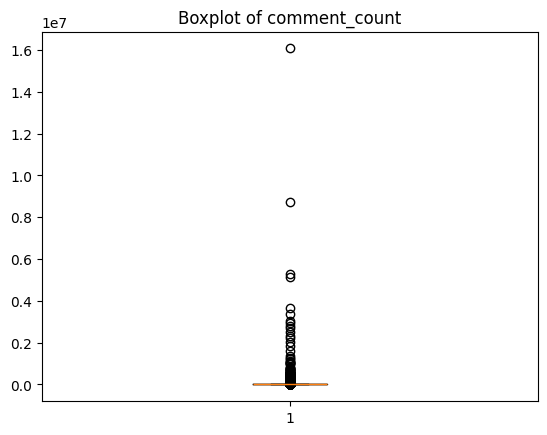

In [14]:
# Visualizing the distribution of numerical data
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float64":
        plt.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.show()

In [15]:
# Drop Unnecessary Columns
df.drop(columns=['video_id','title','channel_id','channel_title','dislikes','description','tags','comments'],inplace=True)
df.head()

,published_at,view_count,likes,comment_count
0,2021-07-01 10:00:00,1048888,19515,1319
1,2021-06-10 16:00:00,15352638,359277,18729
2,2021-09-20 01:03:32,925281,11212,831
3,2021-03-03 10:00:17,2641597,39131,3745
4,2021-12-07 13:00:00,715724,32887,1067


In [16]:
# Convert 'published_at' to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

In [17]:
# Feature Engineering
# ---------------------
df['video_age_days'] = (pd.to_datetime('today') - df['published_at']).dt.days

In [18]:
# Avoid divide-by-zero
df['likes_per_day'] = df['likes'] / (df['video_age_days'] + 1)
df.head()

,published_at,view_count,likes,comment_count,video_age_days,likes_per_day
0,2021-07-01 10:00:00,1048888,19515,1319,1484,13.141414
1,2021-06-10 16:00:00,15352638,359277,18729,1504,238.722259
2,2021-09-20 01:03:32,925281,11212,831,1403,7.985755
3,2021-03-03 10:00:17,2641597,39131,3745,1604,24.380685
4,2021-12-07 13:00:00,715724,32887,1067,1324,24.820377


In [19]:
# Define target: Viral if likes_per_day in top 10%
viral_threshold = df['likes_per_day'].quantile(0.90)
df['target'] = (df['likes_per_day'] > viral_threshold).astype(int)

count    3.742200e+04
mean     1.668147e+05
std      5.375670e+05
min      0.000000e+00
25%      1.323350e+04
50%      4.233050e+04
75%      1.304698e+05
max      3.183768e+07
Name: likes, dtype: float64


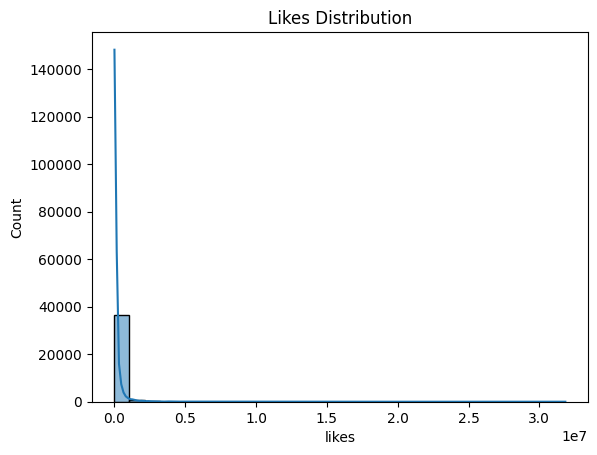

In [24]:
# Summary statistics
print(df['likes'].describe())
# Histogram
sns.histplot(df['likes'].dropna(), kde=True, bins=30)
plt.title('Likes Distribution')
plt.show()

count    3.742200e+04
mean     5.697838e+06
std      2.426622e+07
min      2.036800e+04
25%      5.122970e+05
50%      1.319078e+06
75%      3.670231e+06
max      1.322797e+09
Name: view_count, dtype: float64


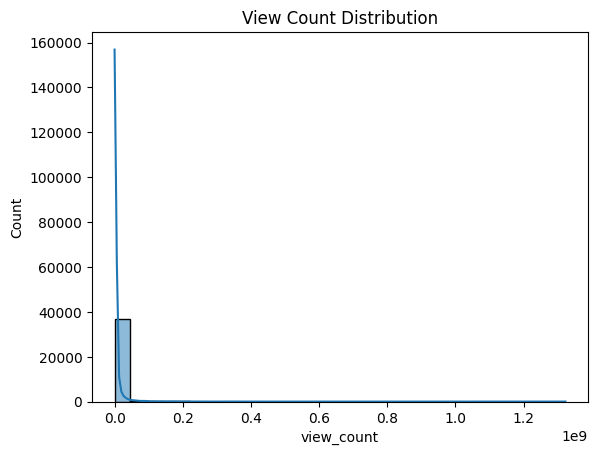

In [21]:
# Summary statistics
print(df['view_count'].describe())
# Histogram
sns.histplot(df['view_count'].dropna(), kde=True, bins=30)
plt.title('View Count Distribution')
plt.show()

count    3.742200e+04
mean     9.924930e+03
std      1.171003e+05
min      0.000000e+00
25%      9.000000e+02
50%      2.328000e+03
75%      6.184000e+03
max      1.607103e+07
Name: comment_count, dtype: float64


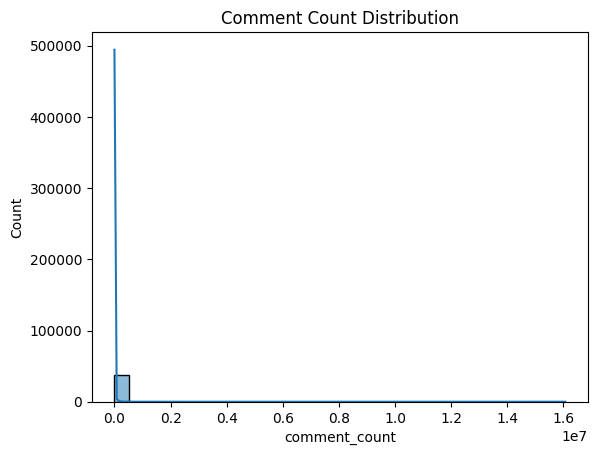

In [22]:
# Summary statistics
print(df['comment_count'].describe())
# Histogram
sns.histplot(df['comment_count'].dropna(), kde=True, bins=30)
plt.title('Comment Count Distribution')
plt.show()

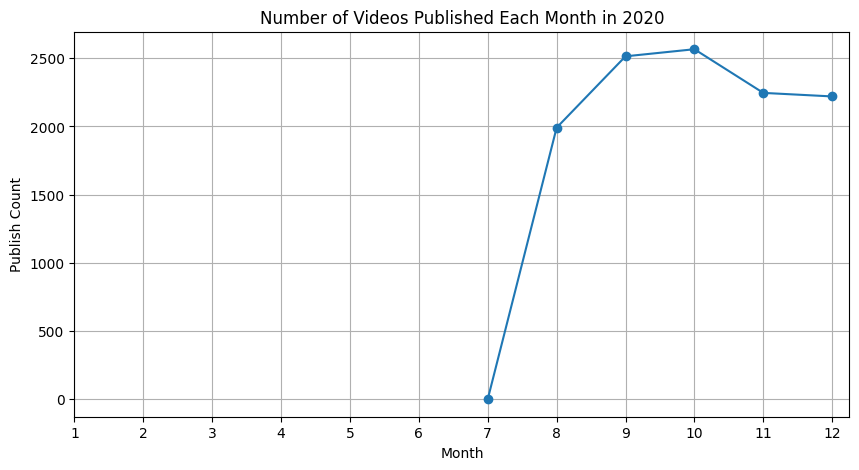

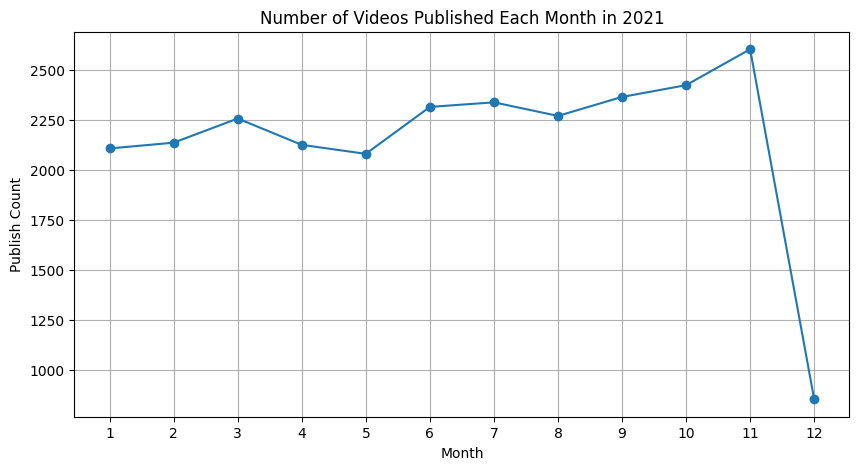

In [26]:
# Ensure 'published_at' is datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Extract year and month
df['year'] = df['published_at'].dt.year
df['month'] = df['published_at'].dt.month

# Group by year and month, count videos
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='publish_count')

# Plot each year in its own figure
years = monthly_counts['year'].unique()
for yr in years:
    data = monthly_counts[monthly_counts['year'] == yr]
    plt.figure(figsize=(10, 5))
    plt.plot(data['month'], data['publish_count'], marker='o')
    plt.title(f'Number of Videos Published Each Month in {yr}')
    plt.xlabel('Month')
    plt.ylabel('Publish Count')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

In [28]:
# Features to use for modeling
features = ['view_count', 'likes', 'comment_count', 'video_age_days', 'likes_per_day']
x = df[features]
y = df['target']

In [29]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# ...existing code...
# model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=5,              # Limit tree depth
#     min_samples_leaf=5,       # Minimum samples per leaf
#     random_state=42
# )
# ...existing code...

In [31]:
# Evaluate model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6736
           1       1.00      1.00      1.00       749

    accuracy                           1.00      7485
   macro avg       1.00      1.00      1.00      7485
weighted avg       1.00      1.00      1.00      7485

Accuracy: 1.0


In [34]:
# Save model
with open("yt_viral_video_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [35]:
print("Model saved as yt_viral_video_model.pkl")

Model saved as yt_viral_video_model.pkl
